# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Constants

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

# Load Image Dataset

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


# Types of Classes

In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Load Model

In [5]:
import os

MODEL_PATH = "saved models"

model_version=max([int(i.split('.',1)[0]) for i in os.listdir(MODEL_PATH)])
model_version

1

In [6]:
model = tf.keras.models.load_model(f"{MODEL_PATH}/{model_version}.h5")

# Testing

1/1 [==============================] - 0s 467ms/step


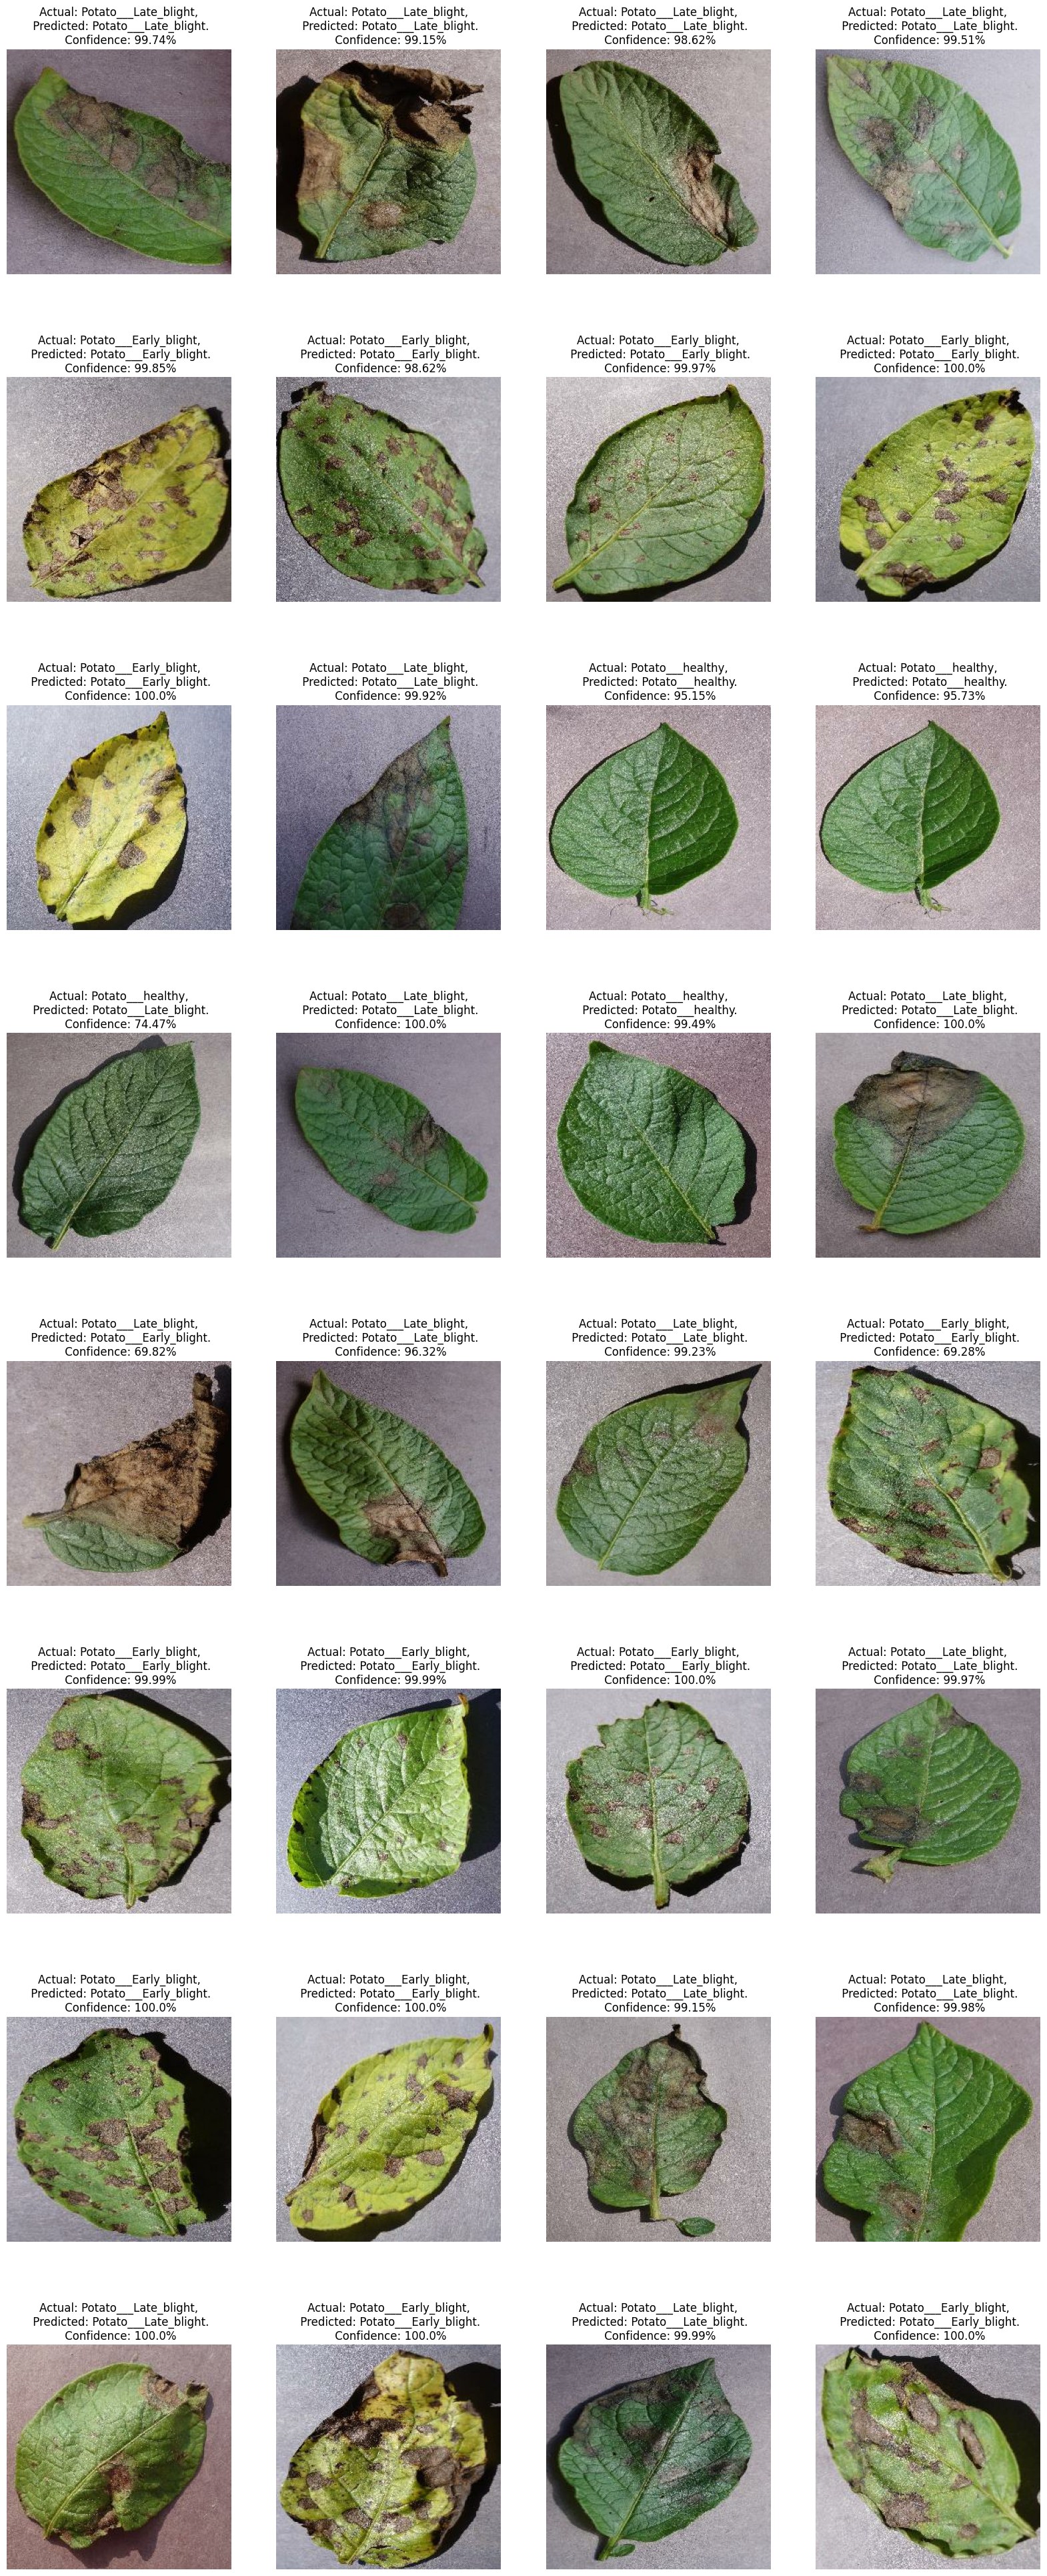

In [7]:
import numpy as np

plt.figure(figsize=(20, 50))
for image_batch, label_batch in dataset.take(1):
    
    prediction_batch = model.predict(image_batch)   # contains array of size len(class_names) with confidence
    
    for i in range(BATCH_SIZE):
        
        image = image_batch[i].numpy().astype("uint8")   # converting float to int
        
        actual_class    = class_names[label_batch[i]]
        predicted_class = class_names[np.argmax(prediction_batch[i])]
        confidence      = round(100 * (np.max(prediction_batch[i])), 2)
        
        ax = plt.subplot(BATCH_SIZE//4, 4, i + 1)   # row, col, idx
        plt.imshow(image)   
        plt.title(class_names[label_batch[i]])
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")